In [1]:
import pandas as pd
import geopandas as gpd
import requests
import subprocess
from sqlalchemy import create_engine
from geoalchemy2 import Geometry, WKTElement
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 Data Preprocessing

## Download Data

In [2]:
token = "vAtl2Z7zE587vSL1K0jPGUqgw"

Download zipcode data

In [3]:
raw_zipcode = gpd.read_file("nyc_zipcodes.shp")
raw_zipcode

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


Download Zillow Data

In [4]:
raw_zillow = pd.read_csv("zillow_rent_data.csv")
raw_zillow

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1606.206406,...,1994.653463,2027.438438,2042.237444,2049.325559,2016.531345,2023.438976,2031.558202,2046.144009,2053.486247,2055.771355
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1257.814660,...,1749.697900,1738.217986,1747.305840,1758.407295,1758.891075,1762.980879,1771.751591,1779.338402,1795.384582,1799.631140
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,NaN,...,1701.217520,1706.900064,1706.067787,1723.722320,1735.484670,1752.132904,1756.990323,1754.429516,1757.602011,1755.031490
3,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1419.480272,1458.063897,1471.726681,1466.734658,1456.175660,1462.478506,1466.267391,1490.237063,1488.180414,1494.366097
4,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6717,418163,30158,89158,zip,NV,NV,Las Vegas,"Las Vegas-Henderson-Paradise, NV",Clark County,NaN,...,3281.330738,3509.210744,3407.499896,3438.041504,3436.371804,3524.703410,3426.708975,3412.249969,3310.302151,3448.166667
6718,72017,30490,32461,zip,FL,FL,Panama City Beach,"Crestview-Fort Walton Beach-Destin, FL",Walton County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2583.675563,2590.977335,2639.938102,2702.500000
6719,58956,30490,2876,zip,RI,RI,North Smithfield,"Providence-Warwick, RI-MA",Providence County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2250.000000
6720,91179,30490,76005,zip,TX,TX,Arlington,"Dallas-Fort Worth-Arlington, TX",Tarrant County,NaN,...,2148.224601,2169.143026,2179.393248,2226.624684,2369.532530,2374.713926,2414.638428,2389.749852,2383.185013,2313.944444


Download 311 data with API

In [5]:
def download_data(token, url) -> pd.DataFrame:
    """
    Download data from an API using the provided token and URL.

    Arguments:
        token (str): The API token for authentication.
        url (str): The URL of the API endpoint for data retrieval.

    Returns:
        pandas.DataFrame: A DataFrame containing the downloaded data.

    """
    # Set up the headers with the API token
    headers = {'X-App-Token': token}

    # Make the API request
    response = requests.get(url, headers=headers)
    data = response.json()

    # Convert the data to a DataFrame
    raw_data = pd.DataFrame(data)

    return raw_data

In [6]:
# API endpoint URL
url_311 = 'https://data.cityofnewyork.us/resource/erm2-nwe9.json?$where=created_date between \'2015-01-01\' and \'2023-10-01\'&$limit=10000000000&$SELECT=created_date,complaint_type,incident_zip,latitude,longitude'

#download data
raw_311 = download_data(token, url_311)
raw_311

,created_date,complaint_type,incident_zip,latitude,longitude
0,2023-09-30T23:59:58.000,Noise - Street/Sidewalk,11226,40.655672001198894,-73.95917686020623
1,2023-09-30T23:59:38.000,Noise - Residential,11361,40.76675595839554,-73.78751847563191
2,2023-09-30T23:59:35.000,Noise - Commercial,10002,40.71949965458691,-73.98486650733275
3,2023-09-30T23:59:34.000,Noise - Residential,11435,40.687499303408536,-73.7972903094197
4,2023-09-30T23:59:28.000,Noise - Residential,11226,40.65220215349917,-73.9579464603267
...,...,...,...,...,...
24336514,2015-01-01T00:00:00.000,Rodent,10039,40.82496024161445,-73.94076840452809
24336515,2015-01-01T00:00:00.000,GENERAL,11207,40.6662283942136,-73.89147549623328
24336516,2015-01-01T00:00:00.000,HEAT/HOT WATER,10455,40.81888439583046,-73.90193517825053
24336517,2015-01-01T00:00:00.000,HEAT/HOT WATER,10019,40.76710752891153,-73.98631416418456


In [7]:
#make a copy
df_311_1 = raw_311.copy()

Download tree data with API

In [8]:
# API endpoint URL
url_tree = 'https://data.cityofnewyork.us/resource/5rq2-4hqu.json?$limit=10000000000'

# Print the data
raw_tree = download_data(token, url_tree)
raw_tree.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,"{'type': 'Point', 'coordinates': [-73.84421521...",3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,1027431.14821,202756.768749
1,09/03/2015,200540,315986,"{'type': 'Point', 'coordinates': [-73.81867945...",21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,1034455.70109,228644.837379
2,09/05/2015,204026,218365,"{'type': 'Point', 'coordinates': [-73.93660770...",3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,1001822.83131,200716.891267
3,09/05/2015,204337,217969,"{'type': 'Point', 'coordinates': [-73.93445615...",10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,1002420.35833,199244.253136
4,08/30/2015,189565,223043,"{'type': 'Point', 'coordinates': [-73.97597938...",21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,990913.775046,182202.425999


In [9]:
#make a copy
df_tree_1 = raw_tree.copy()

## Clean Data

Clean Zipcdoe Data

In [10]:
def clean_zipcode(data: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """
    Clean and process zipcode data.

    Arguments:
        data (geopandas.geodataframe.GeoDataFrame): The input GeoDataFrame containing zipcode data.

    Returns:
        geopandas.geodataframe.GeoDataFrame: A cleaned GeoDataFrame with consistent column names and normalized geometry.

    """
    # Remove unnecessary columns in zipcode data
    data = data.loc[:, ["ZIPCODE", "geometry"]]

    # Remove duplicate rows
    data = data.drop_duplicates().reset_index(drop=True)

    # Rename column names
    data.rename(columns={'ZIPCODE': 'zipcode', 'geometry': 'location'}, inplace=True)

    # Set 'location' column as the geometry
    gdf_zipcode_2 = data.set_geometry('location')

    # Normalize the SRID of the geometry
    gdf_zipcode_2 = gdf_zipcode_2.to_crs('EPSG:4326')

    return gdf_zipcode_2

gdf_zipcode_2 = clean_zipcode(raw_zipcode)
gdf_zipcode_2.head()

,zipcode,location
0,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
1,11213,"POLYGON ((-73.93740 40.67973, -73.93487 40.679..."
2,11212,"POLYGON ((-73.90294 40.67084, -73.90223 40.668..."
3,11225,"POLYGON ((-73.95797 40.67066, -73.95576 40.670..."
4,11218,"POLYGON ((-73.97208 40.65060, -73.97192 40.650..."


Clean Zillow data

In [11]:
def clean_rent(data: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and process rental data from Zillow.

    Argument:
        data (pd.DataFrame): The input DataFrame containing rental data.

    Returns:
        pd.DataFrame: A cleaned DataFrame with columns 'zipcode', 'date', and 'rent'.

    """
    # Concatenate necessary columns
    df_zillow_1 = pd.concat([data.iloc[:, [2, 6]], data.iloc[:, 9:]], axis=1)

    # Drop rows outside of NYC
    index = df_zillow_1[df_zillow_1['City'] != "New York"].index
    df_zillow_2 = df_zillow_1.drop(index).reset_index(drop=True)
    
    # Drop the 'City' column
    df_zillow_2 = df_zillow_2.drop(["City"], axis=1)

    # Change the format of the DataFrame
    df_rent_1 = pd.DataFrame(columns=["zipcode", "date", "rent"])
    temp_data = []
    for index, row in df_zillow_2.iterrows():
        for i in range(len(row)-1):
            temp_data.append({"zipcode": str(int(row[0])), "date": df_zillow_2.columns[i+1], "rent": row[i+1]})
    df_rent_1 = pd.concat([df_rent_1, pd.DataFrame(temp_data)], ignore_index=True)
    
    # Drop rows with missing values in the 'rent' column
    df_rent_1.dropna(subset=['rent'], inplace=True)
    
    # Reset the index
    df_rent_1 = df_rent_1.reset_index(drop=True)

    # Convert the 'date' column to datetime objects
    df_rent_1['date'] = pd.to_datetime(df_rent_1['date'])

    return df_rent_1

df_rent_1 = clean_rent(raw_zillow)
df_rent_1.head()

,zipcode,date,rent
0,11385,2015-02-28,2087.527084
1,11385,2015-04-30,2149.924252
2,11385,2015-05-31,2166.263698
3,11385,2015-06-30,2148.992886
4,11385,2015-07-31,2190.098591


Clean 311 data

In [12]:
def clean_311(data: pd.DataFrame) -> gpd.GeoDataFrame:
    """
    Clean and process 311 data.

    Arguments:
        data (pd.DataFrame): The input DataFrame containing 311 data.

    Returns:
        gpd.GeoDataFrame: A cleaned GeoDataFrame with columns 'zipcode', 'date', 'location', and 'geometry'.

    """
    # Drop rows with missing values
    data.dropna(inplace=True)

    # Rename columns
    data.rename(columns={'incident_zip': 'zipcode', 'created_date': 'date'}, inplace=True)
    
    # Transform date column to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Create 'location' column using latitude and longitude
    data['location'] = [Point(xy) for xy in zip(data.longitude, data.latitude)]

    # Create a GeoDataFrame with 'location' as the geometry column
    gdf_311_1 = gpd.GeoDataFrame(data, geometry='location')

    # Normalize the SRID to EPSG:4326
    gdf_311_1.crs = 'EPSG:4326'

    return gdf_311_1


gdf_311_1 = clean_311(df_311_1)
gdf_311_1.head()

,date,complaint_type,zipcode,latitude,longitude,location
0,2023-09-30 23:59:58,Noise - Street/Sidewalk,11226,40.655672001198894,-73.95917686020623,POINT (-73.95918 40.65567)
1,2023-09-30 23:59:38,Noise - Residential,11361,40.76675595839554,-73.78751847563191,POINT (-73.78752 40.76676)
2,2023-09-30 23:59:35,Noise - Commercial,10002,40.71949965458691,-73.98486650733275,POINT (-73.98487 40.71950)
3,2023-09-30 23:59:34,Noise - Residential,11435,40.687499303408536,-73.7972903094197,POINT (-73.79729 40.68750)
4,2023-09-30 23:59:28,Noise - Residential,11226,40.65220215349917,-73.9579464603267,POINT (-73.95795 40.65220)


Clean Tree Data

In [13]:
def clean_tree(data: pd.DataFrame) -> gpd.GeoDataFrame:
    """
    Clean and process tree data.

    Arguments:
        data (pd.DataFrame): The input DataFrame containing tree data.

    Returns:
        gpd.GeoDataFrame: A cleaned GeoDataFrame with columns 'zipcode', 'tree_id', 'latitude', 'longitude', 'status', 'health', 'species', 'location', and 'geometry'.

    """
    # Remove unnecessary columns
    data = data.loc[:, ["zipcode", "tree_id", "latitude", "longitude", "status", "health", "spc_common"]]

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Rename columns
    data.rename(columns={'spc_common': 'species'}, inplace=True)

    # Add 'location' column using latitude and longitude
    data['location'] = [Point(xy) for xy in zip(data.longitude, data.latitude)]

    # Create a GeoDataFrame with 'location' as the geometry column
    gdf_tree_1 = gpd.GeoDataFrame(data, geometry='location') 
    gdf_tree_1.crs = 'EPSG:4326'

    return gdf_tree_1
gdf_tree_1 = clean_tree(df_tree_1)
gdf_tree_1.head()

,zipcode,tree_id,latitude,longitude,status,health,species,location
0,11375,180683,40.72309177,-73.84421522,Alive,Fair,red maple,POINT (-73.84422 40.72309)
1,11357,200540,40.79411067,-73.81867946,Alive,Fair,pin oak,POINT (-73.81868 40.79411)
2,11211,204026,40.71758074,-73.9366077,Alive,Good,honeylocust,POINT (-73.93661 40.71758)
3,11211,204337,40.71353749,-73.93445616,Alive,Good,honeylocust,POINT (-73.93446 40.71354)
4,11215,189565,40.66677776,-73.97597938,Alive,Good,American linden,POINT (-73.97598 40.66678)


## Part 2: Storing Data

## Create database

In [14]:
def setup_new_postgis_database(db_name):
    """
    Set up a new PostGIS database.

    Arguments:
        db_name (str): The name of the new database.

    Returns:
        None
    """
    # Create the database
    subprocess.run(['createdb', db_name])

    # Enable the PostGIS extension
    subprocess.run(['psql', '--dbname', db_name, '-c', 'CREATE EXTENSION postgis;'])

In [15]:
# Set up the new PostGIS database
setup_new_postgis_database('group36project')

createdb: error: database creation failed: ERROR:  database "group36project" already exists
ERROR:  extension "postgis" already exists


## Create a schema.sql file that defines each table’s schema.

In [16]:
# Connect to the database and enable the PostGIS extension
engine = create_engine('postgresql:///group36project')
conn = engine.connect()
conn.execute("CREATE EXTENSION IF NOT EXISTS postgis;")

In [17]:
def to_schema(df, table_name, geometry='geometry(GEOMETRY,4326)') -> str:
    """
    Generate a schema.sql file based on a DataFrame.

    Arrguments:
        df (pandas.DataFrame): The DataFrame containing the data.
        table_name (str): The name of the table.
        geometry (str, optional): The geometry column type. Defaults to 'geometry(GEOMETRY,4326)'.

    Returns:
        str: The CREATE TABLE statement for the schema.sql file.
    """
    # Get the data types of each column
    dtypes = df.dtypes

    # Create a mapping from pandas data types to SQL data types
    type_mapping = {
        'int64': 'INTEGER',
        'float64': 'REAL',
        'datetime64[ns]': 'TIMESTAMP',
        'object': 'TEXT',
        'geometry': geometry 
    }

    # Generate SQL definitions for each column
    definitions = []
    for column, dtype in dtypes.iteritems():
        sql_type = type_mapping[str(dtype)]
        definitions.append(f'    {column} {sql_type}')
    
    # Generate and return the full CREATE TABLE statement
    return f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY,\n' + ',\n'.join(definitions) + '\n);'

In [18]:
# Using dataframes to create schema.sql files
sql_zipcode = to_schema(gdf_zipcode_2, 'zipcodes', geometry='geometry(POLYGON,4326)')
sql_311 = to_schema(gdf_311_1, 'complaints', geometry='geometry(POINT,4326)')
sql_tree = to_schema(gdf_tree_1, 'trees', geometry='geometry(POINT,4326)')
sql_zillow = to_schema(df_rent_1, 'rents')

/var/folders/78/mzvhkg9541qgk1th67dnww8m0000gn/T/ipykernel_25323/1343850453.py:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [19]:
# Write to 'schema.sql' file
with open('schema.sql', 'w') as f:
    f.write(sql_zipcode)
    f.write(sql_311)
    f.write(sql_tree)
    f.write(sql_zillow)

In [20]:
with open('schema.sql') as f:
    with engine.connect() as connection:
        connection.execute(f.read())

## Add data to database

In [21]:
gdf_311_1.to_postgis("complaints", engine, if_exists='append', index=True, index_label='id')
gdf_tree_1.to_postgis("trees", engine, if_exists='append', index=True, index_label='id')
gdf_zipcode_2.to_postgis("zipcodes", engine, if_exists='append', index=True, index_label='id')
df_rent_1.to_sql("rents", engine, if_exists='append', index=True, index_label='id')

UniqueViolation: duplicate key value violates unique constraint "complaints_pkey"
DETAIL:  Key (id)=(0) already exists.
CONTEXT:  COPY complaints, line 1


# Understanding Data

In [ ]:
def write_query_to_file(query, outfile) -> None:
    """
    Write a SQL query to a file.

    Arguments:
        query (str): The SQL query statement.
        outfile (str): The path of the output file.

    Returns:
        None
    """
    with open(outfile, 'w') as f:
        f.write(query)

In [ ]:
def execute_query(query, filename) -> pd.DataFrame:
    """
    Execute the query to get required data from the database, write it to a file, and return a DataFrame.

    Arguments:
        query (str): The query statement.
        filename (str): The name of the query file.

    Returns:
        pd.DataFrame: DataFrame with the required data.
    """
    # Execute the query and fetch the results into a pandas DataFrame
    df = pd.read_sql_query(query, engine)

    # Execute the query using the connection from the engine
    with engine.connect() as conn:
        conn.execute(text(query))

    # Write the query to a file
    write_query_to_file(query, filename)

    # Display the DataFrame
    return df

### Query 1

In [ ]:
# Define SQL query
query_1 = """
SELECT zipcode, COUNT(*) AS complaints_count
FROM complaints
WHERE date BETWEEN '2022-10-01' AND '2023-10-01'
GROUP BY zipcode
ORDER BY complaints_count DESC;
"""

# Execute the query
result_df_1 = execute_query(query_1, "Query 1")

# Diplay the first 5 rows of the result
result_df_1.head()

### Query 2

In [ ]:
# Define SQL query
query_2 = """
SELECT zipcode, COUNT(*) AS trees_count
FROM trees
GROUP BY zipcode
ORDER BY trees_count DESC
LIMIT 10;
"""

# Execute the query
result_df_2 = execute_query(query_2, "Query 2")

# Diplay the first 5 rows of the result
result_df_2.head()

### Query3

In [ ]:
# Define SQL query
query_3 = """
SELECT trees_count.zipcode, TO_CHAR(rents.rent, 'FM9,999,999,999.99') AS average_rent
FROM (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
    ORDER BY trees_count DESC
    LIMIT 10
) AS trees_count
JOIN rents ON trees_count.zipcode = rents.zipcode
WHERE rents.date = '2023-08-31'
ORDER BY trees_count.trees_count DESC;
"""

# Execute the query
result_df_3 = execute_query(query_3, "Query 3")

# Diplay the first 5 rows of the result
result_df_3.head()

### Query4

In [ ]:
# Define SQL query
query_4 = """
(SELECT h_rent.zipcode, h_rent.rent, trees_count.trees_count, complaints_count.complaints_count 
FROM (
    SELECT zipcode, TO_CHAR(rents.rent, 'FM9,999,999,999.99') AS rent 
    FROM rents
    WHERE date = '2023-01-31'
    ORDER BY rent DESC
    LIMIT 5
) AS h_rent
JOIN  (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
) AS trees_count ON h_rent.zipcode = trees_count.zipcode
JOIN (
    SELECT zipcode, COUNT(*) AS complaints_count
    FROM complaints
    WHERE date BETWEEN '2023-01-01' AND '2023-02-01'
    GROUP BY zipcode
) AS complaints_count ON h_rent.zipcode = complaints_count.zipcode)
UNION ALL
(SELECT l_rent.zipcode, l_rent.rent, trees_count.trees_count, complaints_count.complaints_count 
FROM (
    SELECT zipcode, TO_CHAR(rents.rent, 'FM9,999,999,999.99') AS rent 
    FROM rents
    WHERE date = '2023-01-31'
    ORDER BY rent ASC
    LIMIT 5
) AS l_rent
JOIN  (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
) AS trees_count ON l_rent.zipcode = trees_count.zipcode
JOIN (
    SELECT zipcode, COUNT(*) AS complaints_count
    FROM complaints
    WHERE date BETWEEN '2023-01-01' AND '2023-02-01'
    GROUP BY zipcode
) AS complaints_count ON l_rent.zipcode = complaints_count.zipcode)
"""

# Execute the query
result_df_4 = execute_query(query_4, "Query 4")

# Diplay the first 5 rows of the result
result_df_4.head()

### Query5

In [ ]:
# Define SQL query
query_5 = """
SELECT zipcodes.zipcode, COUNT(*) AS trees_count
FROM trees
JOIN zipcodes ON ST_Within(trees.location, zipcodes.location)
GROUP BY zipcodes.zipcode
ORDER BY trees_count DESC
LIMIT 10
"""

# Execute the query
result_df_5 = execute_query(query_5, "Query 5")

# Diplay the first 5 rows of the result
result_df_5.head()

### Query6

In [ ]:
# Get target point
target_point = "POINT(-73.96253174434912 40.80737875669467)"

# Define SQL query
query_6 = f"""
SELECT tree_id AS id, species, health, status, ST_AsText(location) AS location 
FROM trees 
WHERE ST_DWithin(ST_Transform(location, 4326)::geography, ST_GeomFromText('{target_point}', 4326)::geography, 804.672);
"""

# Execute the query
result_df_6 = execute_query(query_6, "Query 6")

# Diplay the first 5 rows of the result
result_df_6.head()

# Visualizing Data

In [ ]:
def get_data(query) -> pd.DataFrame:
    """
    Execute the query to get the required data from the database and read the data into a DataFrame.

    Arguments:
        query (str): The SQL query statement.

    Returns:
        pandas.DataFrame: DataFrame containing the retrieved data.
    """
    # Execute the query and fetch the results into a pandas DataFrame
    df = pd.read_sql_query(query, engine)

    # Return the DataFrame
    return df

## Visualization 1

Here we choose line chart, because it can clearly show the trends and changes of the numbers of all top 3 complaint types for October 1st, 2022 to September 30th, 2023.

In [ ]:
# Define SQL query
query_visual_1 = """
WITH TopComplaintTypes AS (
    SELECT complaint_type, COUNT(*) AS complaint_count
    FROM complaints
    WHERE date BETWEEN '2022-10-01' AND '2023-10-01'
    GROUP BY complaint_type
    ORDER BY complaint_count DESC
    LIMIT 3
)
SELECT DATE_TRUNC('day', date::timestamp) AS truncated_date,
       complaint_type,
       COUNT(*) AS complaint_count
FROM complaints
WHERE complaint_type IN (SELECT complaint_type FROM TopComplaintTypes)
      AND date BETWEEN '2022-10-01' AND '2023-10-01'
GROUP BY truncated_date, complaint_type
ORDER BY truncated_date, complaint_count DESC;
"""

# Get data
df_visual_1 = get_data(query_visual_1)

In [ ]:
# Display the first 5 rows in the dataframe
df_visual_1.head()

,truncated_date,complaint_type,complaint_count
0,2022-10-01,Noise - Residential,1152
1,2022-10-01,Illegal Parking,986
2,2022-10-01,HEAT/HOT WATER,498
3,2022-10-02,Noise - Residential,1051
4,2022-10-02,Illegal Parking,984


In [ ]:
def get_top_3_complaint_type(data=df_visual_1) -> str:
    """
    Get the top 3 complaint types based on df_visual_1.

    Arguments:
        data (pandas.DataFrame): DataFrame containing the complaint data.

    Returns:
        str: String containing the top 3 complaint types.
    """
    types = data["complaint_type"].unique()
    return f"Top 3 complaint types for October 1st, 2022 to September 30th, 2023 (inclusive) are: {types[0]}, {types[1]}, {types[2]}"

In [ ]:
# Display the top 3 complaint types
Get_Top_3_Complaint_Type()

'Top 3 complaint types for October 1st, 2022 to September 30th, 2023 (inclusive) are: Noise - Residential, Illegal Parking, HEAT/HOT WATER'

In [ ]:

def visualization_1(df=df_visual_1) -> None:
    """
    Use line plot to visualize the data of top 3 complaint types.

    Argument:
        df: data of top 3 complaint types

    Return: 
        None
    """
    df['truncated_date'] = pd.to_datetime(df['truncated_date'])

    # Create a line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='truncated_date', y='complaint_count', hue='complaint_type', data=df)
    
    # Set axis labels and title
    plt.title('Number of Complaints per Day for Top Complaint Types')
    plt.xlabel('Date')
    plt.ylabel('Complaint Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plt.show()

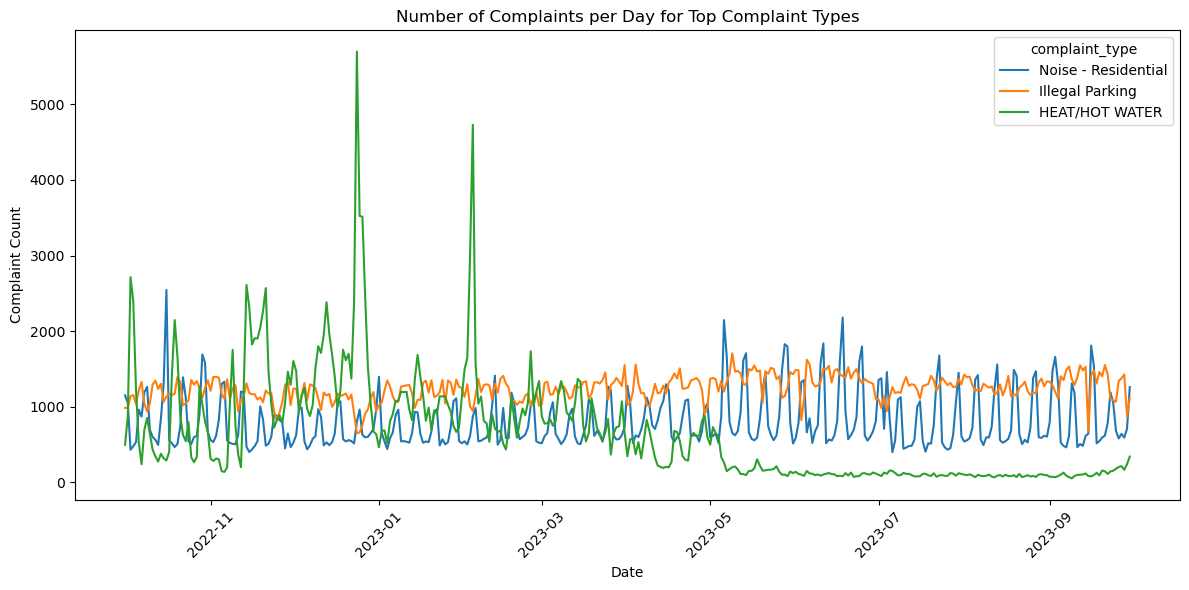

In [ ]:
# Use line plot to visualize the data of top 3 complaint types.
visualization_1()